## Task 1: Getting familiar with the data

Your first task is to conduct initial analyses to understand the data and process it in a way that will allow us to more easily answer our key question: *how does the language of a headline determine its success?*

1.1 Load the data into memory using pandas and print the first lines to get a sense of it.


In [30]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# load data
DATA_PATH = './data/upworthy.csv.gz'
df = pd.read_csv(DATA_PATH)

In [32]:
# print first 5 lines
df.head(5)

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
0,2014-11-20 06:43:16.005,2016-04-02 16:33:38.062,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3052,150,100.0,True,True,Anyone who's ever felt guilty about shopping a...,NaN,201446
1,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
2,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446
3,2014-11-20 06:55:07.212,2016-04-02 16:25:54.029,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c6c44000038,3380,98,25.3,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
4,2014-11-20 06:55:20.347,2016-04-02 16:25:54.032,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c1ad900001e,3465,75,0.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446


In [33]:
# basic statistics of the dataframe
df.describe()

,impressions,clicks,significance,test_week
count,20603.000000,20603.000000,20603.000000,20603.000000
mean,3590.016988,54.565694,39.890103,201414.393972
std,1453.443624,47.809957,39.643415,56.191437
min,13.000000,0.000000,0.000000,201303.000000
25%,2735.000000,24.000000,2.500000,201350.000000
50%,3128.000000,42.000000,24.100000,201427.000000
75%,4103.500000,70.000000,83.700000,201443.000000
max,25314.000000,975.000000,100.000000,201517.000000


1.2 Each experiment comparing different versions of the same news piece ("packages") has a unique identifier (`clickability_test_id` column). 
Calculate how many different experiments were conducted in this dataset and, on average, how many packages were considered per experiment. 
Last, plot the distribution of packages per experiment with a visualization of your choice.

In [34]:
# count how many different experiments were conducted in this dataset
num_experiments = df['clickability_test_id'].nunique()
print(f'There are {num_experiments} different experiments were conducted.')

There are 4822 different experiments were conducted.


In [35]:
experiment_count = df['clickability_test_id'].value_counts(dropna=False)
experiment_count.describe()

count    4822.000000
mean        4.272708
std         1.444858
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max        14.000000
Name: clickability_test_id, dtype: float64

On average, 4.272708 packages were considered per experiment.

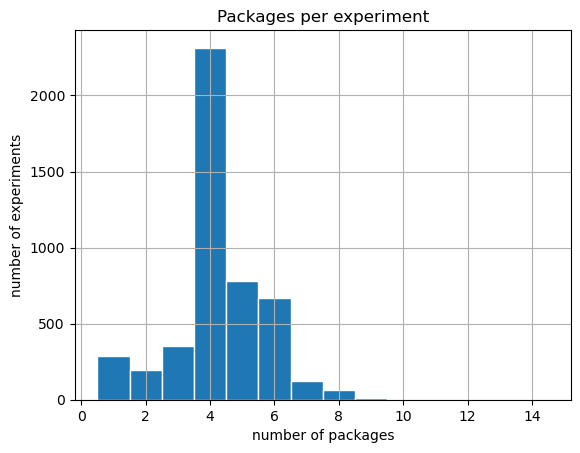

In [36]:
# plot the distribution of packages per experiment with histogram
experiment_count.plot.hist(bins=np.arange(0.5,15.5),edgecolor='white')
plt.title('Packages per experiment')
plt.ylabel('number of experiments')
plt.xlabel('number of packages')
plt.grid(drawstyle="steps")
plt.show()

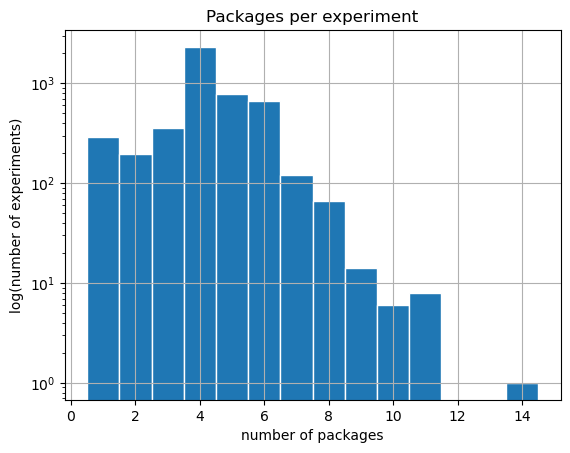

In [37]:
# it's hard to see number of experiments with high number of packages, apply log to visualize again
experiment_count.plot.hist(bins=np.arange(0.5,15.5),edgecolor='white',logy=True)
plt.title('Packages per experiment')
plt.ylabel('log(number of experiments)')
plt.xlabel('number of packages')
plt.grid(drawstyle="steps")
plt.show()

1.3 A common way to measure success in online A/B tests is what is called "the clickthrough rate."
Given that often A/B tests are created to find what engages users (here, "packages" of headlines, images, etc), we would expect that a "good" package makes people click often. 
Create a column named `ctr` by dividing the number of clicks a package received (`clicks` column) by the number of impressions it received (`impressions` column).

In [38]:
df['ctr'] = df['clicks'] / df['impressions']
df.head(5)

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week,ctr
0,2014-11-20 06:43:16.005,2016-04-02 16:33:38.062,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3052,150,100.0,True,True,Anyone who's ever felt guilty about shopping a...,NaN,201446,0.049148
1,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.025525
2,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.034227
3,2014-11-20 06:55:07.212,2016-04-02 16:25:54.029,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c6c44000038,3380,98,25.3,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.028994
4,2014-11-20 06:55:20.347,2016-04-02 16:25:54.032,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c1ad900001e,3465,75,0.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.021645


1.4 Packages varied any combination of the headline (`headline` column), the excerpt (`excerpt`), the first sentence of the article (`lede`), and the image that illustrates the news piece (`eyecatcher_id`, a hash per image). 
But we want to isolate the effect of the headline on the clickthrough rate. To do that, create a new dataframe where you filter all experiments where only one headline is present. 
Print the length of this new dataframe and how many experiments were discarded in the filtering process.

In [56]:
# exclude the experiments that only one headline is present
# as the TA said in ED, there will be no punishment if there is only one experiment and we removed it.
df_headline = df[df['clickability_test_id'].map(
        df.groupby(['clickability_test_id'])['headline'].nunique() > 1)]
df_headline = df_headline.reset_index(drop = True)
num_disgarded = len(df.clickability_test_id.unique()) - len(df_headline.clickability_test_id.unique())
print(f"Dataframe df_headline is the filtered dataframe. The length of it is {len(df_headline)}. There are {num_disgarded} experiments discarded.")

Dataframe df_headline is the filtered dataframe. The length of it is 11600. There are 2236 experiments discarded.


In [57]:
df_headline

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week,ctr
0,2014-11-20 14:57:52.478,2016-04-02 16:25:54.161,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,what-they-learned-from-the-scientist-was-terri...,546c7f2dbadeb5788700000a,4594,51,20.7,False,False,NaN,NaN,201446,0.011101
1,2014-11-20 14:54:18.78,2016-04-02 16:25:54.159,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,A Science Guy Helps 3 Dudes From America Under...,<p>Some decent guys fighting for an important ...,a-science-guy-helps-3-dudes-from-america-under...,546c7f2dbadeb5788700000a,4571,58,57.6,False,False,NaN,NaN,201446,0.012689
2,2014-11-20 15:04:49.517,2016-04-02 16:25:54.112,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,He Sat Them Down And Told Them About An Immine...,<p>Some decent guys fighting for an important ...,he-sat-them-down-and-told-them-about-an-immine...,546c7f2dbadeb5788700000a,4601,27,0.0,False,False,NaN,NaN,201446,0.005868
3,2014-11-20 15:13:36.266,2016-04-02 16:31:47.52,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,"The 3 Of Them Needed To See It In Person, And ...",<p>Some decent guys fighting for an important ...,the-3-of-them-needed-to-see-it-in-person-and-t...,546c7f2dbadeb5788700000a,4567,63,100.0,True,False,NaN,NaN,201446,0.013795
4,2014-11-20 15:15:25.697,2016-04-02 16:25:54.117,546e009a9ad54ec65b00004b,Things that matter. Pass 'em on.,"They May Not Be The Most Handsome Dudes, But T...",<p>Some decent guys fighting for an important ...,they-may-not-be-the-most-handsome-dudes-but-th...,546c7f2dbadeb5788700000a,4524,44,4.5,False,False,NaN,NaN,201446,0.009726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11595,2014-11-19 22:08:27.941,2016-04-02 16:25:53.856,546c503abadeb51585000003,Things that matter. Pass 'em on.,"A Pen, Paper, And Watercolors Tell One Of The ...",<p>Sad but true: It took the deaths of several...,a-pen-paper-and-watercolors-tell-one-of-the-mo...,546c567f545240b352000009,1923,21,0.0,False,False,NaN,NaN,201446,0.010920
11596,2014-11-20 01:22:43.054,2016-04-02 16:25:53.914,546d373426714cde76000018,Things that matter. Pass 'em on.,Newsflash: Black People Travel Too. Here's Why.,<p>Travel isn't just a luxury or indulgence an...,newsflash-black-people-travel-too-heres-why-ew...,546d398a9ad54eec8d00000f,3575,15,0.0,False,False,NaN,NaN,201446,0.004196
11597,2014-11-20 01:21:49.197,2016-04-02 16:25:53.916,546d373426714cde76000018,Things that matter. Pass 'em on.,5 Reasons You May Need To Plan A Vacation - Ri...,<p>Travel isn't just a luxury or indulgence an...,5-reasons-you-may-need-to-plan-a-vacation-righ...,546d398a9ad54eec8d00000f,3724,18,0.0,True,False,NaN,NaN,201446,0.004834
11598,2014-11-20 01:23:31.203,2016-04-02 16:31:40.651,546d373426714cde76000018,Things that matter. Pass 'em on.,The Next Time You Encounter A Small Minded Big...,<p>Travel isn't just a luxury or indulgence an...,the-next-time-you-encounter-a-small-minded-big...,546d398a9ad54eec8d00000f,3728,23,0.0,False,False,NaN,NaN,201446,0.006170


1.5 For comparison, repeat the procedure described in **T1.4** with the `eyecatcher_id` column, i.e., create a dataframe considering only experiments that vary the image. 
Again, print the length of this new dataframe and how many experiments were discarded in the filtering process.

In [58]:
# exclude the experiments that have only one image
# as the TA said in ED, there will be no punishment if there is only one experiment and we removed it.
df_eyecatcher = df[df['clickability_test_id'].map(
        df.groupby(['clickability_test_id'])['eyecatcher_id'].nunique() > 1)]
df_eyecatcher = df_eyecatcher.reset_index(drop = True)
num_disgarded = len(df.clickability_test_id.unique()) - len(df_eyecatcher.clickability_test_id.unique())
print(f"Dataframe df_eyecatcher is the filtered dataframe. The length of it is {len(df_eyecatcher)}. There are {num_disgarded} experiments discarded.")

Dataframe df_eyecatcher is the filtered dataframe. The length of it is 7930. There are 3108 experiments discarded.


In [59]:
df_eyecatcher

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week,ctr
0,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.025525
1,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.034227
2,2014-11-20 06:55:07.212,2016-04-02 16:25:54.029,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c6c44000038,3380,98,25.3,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.028994
3,2014-11-20 06:55:20.347,2016-04-02 16:25:54.032,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c1ad900001e,3465,75,0.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.021645
4,2014-11-20 06:55:43.497,2016-04-02 16:25:54.034,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900484ad38b2ce000027,3431,86,3.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.025066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7925,2014-11-20 00:13:23.181,2016-04-02 16:31:48.678,546d2a3f26714c6c44000008,Things that matter. Pass 'em on.,Ever Wonder How Much Rape Costs? Yep. There's ...,<p>Violence against women isn't just emotional...,ever-wonder-how-much-rape-costs-yep-theres-act...,546d31e126714c1ad9000006,3007,35,11.4,False,False,For those who say we don't have a serious prob...,NaN,201446,0.011640
7926,2014-11-20 00:16:47.162,2016-04-02 16:31:48.59,546d2a3f26714c6c44000008,Things that matter. Pass 'em on.,Ever Wonder How Much Rape Costs? Yep. There's ...,<p>Violence against women isn't just emotional...,ever-wonder-how-much-rape-costs-yep-theres-act...,546d32db26714c0538000011,3126,36,7.5,False,False,For those who say we don't have a serious prob...,NaN,201446,0.011516
7927,2014-11-20 00:18:06.817,2016-04-02 16:31:45.951,546d2a3f26714c6c44000008,Things that matter. Pass 'em on.,Ever Wonder How Much Rape Costs? Yep. There's ...,<p>Violence against women isn't just emotional...,ever-wonder-how-much-rape-costs-yep-theres-act...,546d333584ad38b2ce000008,2945,36,13.4,False,False,For those who say we don't have a serious prob...,NaN,201446,0.012224
7928,2014-11-20 00:19:36.07,2016-04-02 16:31:47.787,546d2a3f26714c6c44000008,Things that matter. Pass 'em on.,Ever Wonder How Much Rape Costs? Yep. There's ...,<p>Violence against women isn't just emotional...,ever-wonder-how-much-rape-costs-yep-theres-act...,546d337a9ad54e1f77000007,3060,54,81.9,False,False,For those who say we don't have a serious prob...,NaN,201446,0.017647


1.6 **Discuss:** Considering the answers to questions **T1.4** and **T1.5**, what can we say about the different versions of the news tested by Upworthy?

Upworthy tests more experiments on the effect of the headline on the clickthrough rate than the effect of the eyecatcher_id(image) on the clickthrough rate. Generally, in each experiment(with same clickability_test_id), there's more diversity in headline than in eyecatcher_id(image).

1.7 For our subsequent analysis, we want to compare the causal effect of headlines on the success of a news piece. 
For that, we can compare pairs of packages with the same `eyecatcher_id`, `lede`, and `excerpt`, but different `headlines`.
Note that this means that if an experiment considered 5 different headlines and did not vary any other stimulus, we would have 5C2 (i.e., 5 choose 2, 10) pairs to consider.
Create a dataset where:
- each row corresponds to a pair of packages with different `headline` but the same `eyecatcher_id`, `lede`, and `excerpt`. 
- there are columns containing the headlines of each of the news versions (`headline1`, `headline2`) and the clickthrough rate of each of the news versions (`ctr1`, `ctr2`). 
- the columns `headline1` and `ctr1` contain the data associated with the news version with the highest clickthrough rate. Print the first rows of your newly created dataframe, as well as its length.
-  the rows where the two news pieces had exactly the same clickthrough rate should be filtered out (this is for simplicity's sake).
-  the column `date_created` contains the date when the news version with the highest clickthrough rate was created.

In [60]:
df_headline.groupby(
    ['clickability_test_id','eyecatcher_id','lede','excerpt'])

In [13]:
df_headline.clickability_test_id.nunique()

2586